# Tutorial - Step1: MTMR pretraining with only margin loss

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from MTMR.vae import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "drd2"
TEST_NUM = "01"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_5-1_{PROPERTY_NAME.upper()}_pretraining_{TEST_NUM}"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [8]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [9]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [10]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [11]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [12]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             use_contractive=False,
                                             use_margin=True,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 3.437  loss_recon_src(tr): 3.437  loss_recon_tar(tr): 3.433  loss_recon_neg(tr): 3.440  loss_contractive(tr): 0.426  loss_margin(tr): 1.934  beta: 0.000  gamma: 0.000  valid_ratio(va): 0.102  similarity(va): 0.003
[00001000/00100000]  loss(tr): 0.361  loss_recon_src(tr): 0.431  loss_recon_tar(tr): 0.265  loss_recon_neg(tr): 0.381  loss_contractive(tr): 364.854  loss_margin(tr): 0.000  beta: 0.000  gamma: 0.020  valid_ratio(va): 0.906  similarity(va): 0.210
[00002000/00100000]  loss(tr): 0.174  loss_recon_src(tr): 0.275  loss_recon_tar(tr): 0.077  loss_recon_neg(tr): 0.171  loss_contractive(tr): 388.646  loss_margin(tr): 0.000  beta: 0.000  gamma: 0.040  valid_ratio(va): 0.942  similarity(va): 0.309
[00003000/00100000]  loss(tr): 0.114  loss_recon_src(tr): 0.188  loss_recon_tar(tr): 0.047  loss_recon_neg(tr): 0.109  loss_contractive(tr): 397.676  loss_margin(tr): 0.000  beta: 0.000  gamma: 0.060  valid_ratio(va): 0.946  similarity(va): 0.366
[00004000/0010

[00034000/00100000]  loss(tr): 0.007  loss_recon_src(tr): 0.009  loss_recon_tar(tr): 0.005  loss_recon_neg(tr): 0.006  loss_contractive(tr): 321.606  loss_margin(tr): 0.000  beta: 0.000  gamma: 0.680  valid_ratio(va): 0.776  similarity(va): 0.423
[00035000/00100000]  loss(tr): 0.005  loss_recon_src(tr): 0.007  loss_recon_tar(tr): 0.002  loss_recon_neg(tr): 0.006  loss_contractive(tr): 320.564  loss_margin(tr): 0.000  beta: 0.000  gamma: 0.700  valid_ratio(va): 0.738  similarity(va): 0.406
[00036000/00100000]  loss(tr): 0.007  loss_recon_src(tr): 0.010  loss_recon_tar(tr): 0.002  loss_recon_neg(tr): 0.009  loss_contractive(tr): 301.956  loss_margin(tr): 0.000  beta: 0.000  gamma: 0.720  valid_ratio(va): 0.770  similarity(va): 0.427
[00037000/00100000]  loss(tr): 0.006  loss_recon_src(tr): 0.008  loss_recon_tar(tr): 0.002  loss_recon_neg(tr): 0.007  loss_contractive(tr): 298.404  loss_margin(tr): 0.000  beta: 0.000  gamma: 0.740  valid_ratio(va): 0.748  similarity(va): 0.409
[00038000/00

[00068000/00100000]  loss(tr): 0.003  loss_recon_src(tr): 0.004  loss_recon_tar(tr): 0.002  loss_recon_neg(tr): 0.004  loss_contractive(tr): 173.197  loss_margin(tr): 0.000  beta: 0.000  gamma: 1.000  valid_ratio(va): 0.668  similarity(va): 0.377
[00069000/00100000]  loss(tr): 0.005  loss_recon_src(tr): 0.008  loss_recon_tar(tr): 0.003  loss_recon_neg(tr): 0.004  loss_contractive(tr): 178.435  loss_margin(tr): 0.000  beta: 0.000  gamma: 1.000  valid_ratio(va): 0.676  similarity(va): 0.389
[00070000/00100000]  loss(tr): 0.003  loss_recon_src(tr): 0.004  loss_recon_tar(tr): 0.002  loss_recon_neg(tr): 0.004  loss_contractive(tr): 166.028  loss_margin(tr): 0.000  beta: 0.000  gamma: 1.000  valid_ratio(va): 0.708  similarity(va): 0.395
[00071000/00100000]  loss(tr): 0.005  loss_recon_src(tr): 0.008  loss_recon_tar(tr): 0.001  loss_recon_neg(tr): 0.006  loss_contractive(tr): 159.599  loss_margin(tr): 0.000  beta: 0.000  gamma: 1.000  valid_ratio(va): 0.678  similarity(va): 0.389
[00072000/00

## 9. Visualize for loss analysis

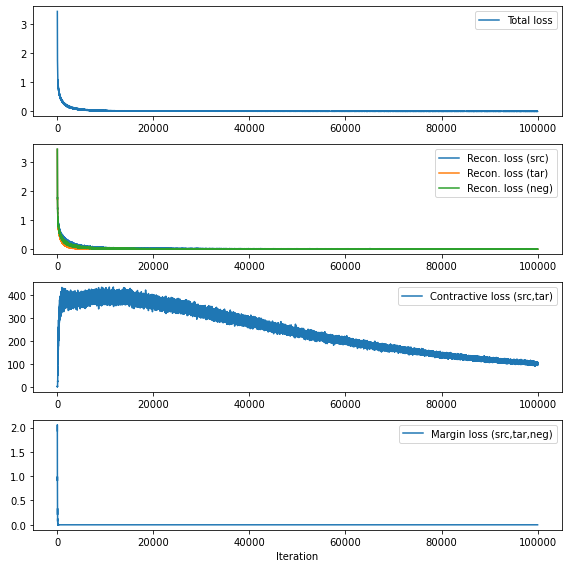

In [13]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_CONTRACTIVE"], label="Contractive loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_MARGIN"], label="Margin loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

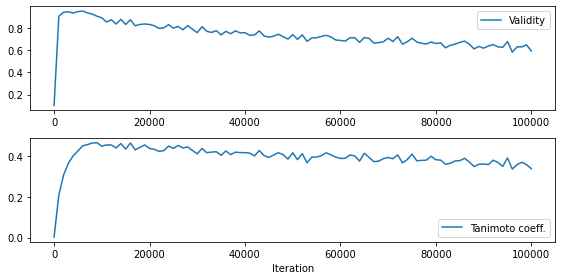

In [14]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()